**PROJECT : SATELLITE IMAGE CLASSIFICATION**

Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot



In [ ]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir('/content/drive/MyDrive/CNN/Train_S')

['cloudy', 'green_area', 'water', 'desert']

In [ ]:
datadir='/content/drive/MyDrive/CNN/Train_S'

In [ ]:
X_train=[]
y_train=[]
Categories=['cloudy', 'green_area', 'water', 'desert']
for i in Categories:
  print("Loading............",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    X_train.append(img_resized)
    y_train.append(Categories.index(i))
  print("Completed.......",i)

Loading............ cloudy
Completed....... cloudy
Loading............ green_area
Completed....... green_area
Loading............ water
Completed....... water
Loading............ desert
Completed....... desert


In [ ]:
img_arr.shape

(256, 256, 3)

In [ ]:
print(img_arr)

[[[205 161 100]
  [205 161 100]
  [205 161 100]
  ...
  [200 157 102]
  [201 158 103]
  [206 163 108]]

 [[207 163 102]
  [207 163 102]
  [208 164 103]
  ...
  [199 156 101]
  [201 158 103]
  [205 162 107]]

 [[210 166 105]
  [210 166 105]
  [210 166 105]
  ...
  [200 157 102]
  [201 158 103]
  [205 162 107]]

 ...

 [[219 175 114]
  [218 174 113]
  [217 173 112]
  ...
  [203 162 106]
  [203 162 106]
  [203 162 106]]

 [[219 175 114]
  [218 174 113]
  [217 173 112]
  ...
  [204 163 107]
  [203 162 106]
  [203 162 106]]

 [[218 174 113]
  [217 173 112]
  [216 172 111]
  ...
  [205 164 108]
  [204 163 107]
  [203 162 106]]]


In [ ]:
img_resized.shape

(150, 150, 1)

In [ ]:
img_resized

array([[[0.61792849],
        [0.61951048],
        [0.62185019],
        ...,
        [0.61912607],
        [0.60364594],
        [0.61942084]],

       [[0.63465724],
        [0.63527484],
        [0.63856683],
        ...,
        [0.61193854],
        [0.60528727],
        [0.61798654]],

       [[0.6384648 ],
        [0.63960459],
        [0.64242095],
        ...,
        [0.61726117],
        [0.62116974],
        [0.62147103]],

       ...,

       [[0.65272271],
        [0.65231036],
        [0.65644647],
        ...,
        [0.61539619],
        [0.61672202],
        [0.6213655 ]],

       [[0.66777183],
        [0.66146099],
        [0.65501562],
        ...,
        [0.61678285],
        [0.62028139],
        [0.62098227]],

       [[0.66590169],
        [0.65930067],
        [0.65450992],
        ...,
        [0.62957188],
        [0.62728839],
        [0.621738  ]]])

In [ ]:
X_test=[]
y_test=[]
Categories=['cloudy', 'green_area', 'water', 'desert']
datadir='/content/drive/MyDrive/CNN/Test_S'
for i in Categories:
  print("Loading............",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    X_test.append(img_resized)
    y_test.append(Categories.index(i))
  print("Completed.......",i)

Loading............ cloudy
Completed....... cloudy
Loading............ green_area
Completed....... green_area
Loading............ water
Completed....... water
Loading............ desert
Completed....... desert


In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(3697, 150, 150, 1)

In [ ]:
X_test.shape

(1944, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
185/185 [==============================] - 91s 488ms/step - loss: 0.8947 - accuracy: 0.5794
Epoch 2/20
185/185 [==============================] - 85s 462ms/step - loss: 0.7312 - accuracy: 0.6741
Epoch 3/20
185/185 [==============================] - 86s 465ms/step - loss: 0.7123 - accuracy: 0.6889
Epoch 4/20
185/185 [==============================] - 84s 453ms/step - loss: 0.7148 - accuracy: 0.6949
Epoch 5/20
185/185 [==============================] - 85s 458ms/step - loss: 0.6986 - accuracy: 0.7006
Epoch 6/20
185/185 [==============================] - 93s 504ms/step - loss: 0.6870 - accuracy: 0.7016
Epoch 7/20
185/185 [==============================] - 91s 490ms/step - loss: 0.6948 - accuracy: 0.6954
Epoch 8/20
185/185 [==============================] - 88s 476ms/step - loss: 0.6772 - accuracy: 0.7071
Epoch 9/20
185/185 [==============================] - 85s 459ms/step - loss: 0.6680 - accuracy: 0.7119
Epoch 10/20
185/185 [==============================] - 85s 462ms/step - l

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print("LOSS :",loss)
print("Accuracy :",accuracy)

61/61 [==============================] - 14s 223ms/step - loss: 0.7885 - accuracy: 0.6641
LOSS : 0.7885316610336304
Accuracy : 0.6640946269035339


In [ ]:
img=imread('/content/drive/MyDrive/CNN/Test_S/cloudy/train_101.jpg')
img

array([[[107, 106, 121,   0],
        [113, 111, 127,   0],
        [117, 115, 132,   0],
        ...,
        [158, 152, 160,   0],
        [156, 152, 160,   0],
        [155, 152, 160,   0]],

       [[ 98,  97, 111,   0],
        [104, 103, 118,   0],
        [110, 108, 124,   0],
        ...,
        [158, 153, 161,   0],
        [157, 153, 161,   0],
        [157, 153, 161,   0]],

       [[ 86,  87,  99,   0],
        [ 93,  94, 107,   0],
        [100, 101, 114,   0],
        ...,
        [158, 154, 162,   0],
        [159, 154, 162,   0],
        [159, 155, 163,   0]],

       ...,

       [[ 49,  53,  67,   0],
        [ 51,  54,  69,   0],
        [ 53,  55,  71,   0],
        ...,
        [112, 112, 124,   0],
        [112, 113, 125,   0],
        [116, 118, 131,   0]],

       [[ 52,  54,  71,   0],
        [ 52,  55,  71,   0],
        [ 51,  56,  70,   0],
        ...,
        [114, 112, 126,   0],
        [112, 110, 125,   0],
        [114, 112, 128,   0]],

       [[ 54

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 122ms/step


array([[9.181443e-01, 9.319791e-04, 8.024281e-02, 6.809492e-04]],
      dtype=float32)

In [ ]:
ind=pred.argmax(axis=1)
ind

array([0])

In [ ]:
Categories[ind.item()]

'cloudy'

array([[[23, 42, 72],
        [24, 43, 73],
        [23, 42, 74],
        ...,
        [24, 43, 73],
        [23, 42, 72],
        [23, 42, 72]],

       [[22, 41, 71],
        [23, 42, 72],
        [23, 42, 74],
        ...,
        [24, 43, 73],
        [23, 42, 72],
        [23, 42, 72]],

       [[22, 43, 72],
        [24, 43, 73],
        [23, 42, 72],
        ...,
        [23, 44, 73],
        [23, 42, 72],
        [23, 42, 72]],

       ...,

       [[22, 43, 72],
        [22, 43, 72],
        [23, 44, 75],
        ...,
        [22, 43, 72],
        [23, 42, 72],
        [23, 42, 72]],

       [[23, 44, 73],
        [23, 44, 73],
        [24, 43, 73],
        ...,
        [23, 42, 72],
        [23, 42, 72],
        [24, 43, 73]],

       [[23, 44, 73],
        [23, 44, 73],
        [23, 42, 72],
        ...,
        [23, 42, 72],
        [24, 43, 73],
        [24, 43, 73]]], dtype=uint8)
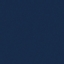

In [ ]:
img1=imread('/content/drive/MyDrive/CNN/Test_S/water/SeaLake_1004.jpg')
img1

In [ ]:
img1=resize(img1,(150,150,1))
img1.shape

(150, 150, 1)

In [ ]:
img1=img1.reshape(1,150,150,1)
img1.shape

(1, 150, 150, 1)

In [ ]:
pred1=model.predict(img1)
pred1

1/1 [==============================] - 0s 34ms/step


array([[2.03750692e-02, 1.11074924e-01, 8.68548214e-01, 1.74186630e-06]],
      dtype=float32)

In [ ]:
inde=pred1.argmax(axis=1)
inde

array([2])

In [ ]:
Categories[inde.item()]

'water'

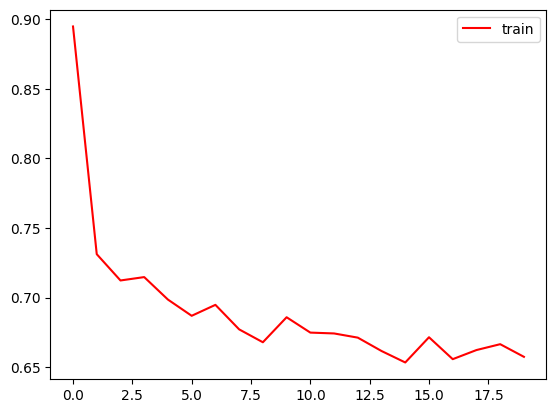

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.legend()
plt.show()


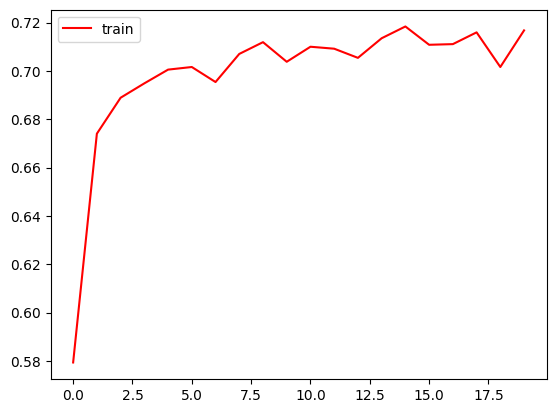

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.legend()
plt.show()